# Smart Room Occupancy Monitoring System Using IoT Sensors and Deep Learning
## Final Project Report Implementation
This Jupyter Notebook contains the implementation of data processing, exploratory data analysis, machine learning, and deep learning models used for occupancy detection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Preprocessing

In [5]:
# Load dataset
# Path to your CSV file within Colab
csv_path = '/content/sample_data/Occupancy_Estimation.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Print some information about the DataFrame
print(df.head())

         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0       

## Exploratory Data Analysis (EDA)

In [6]:
# Summary Statistics
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
# Check for missing values
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

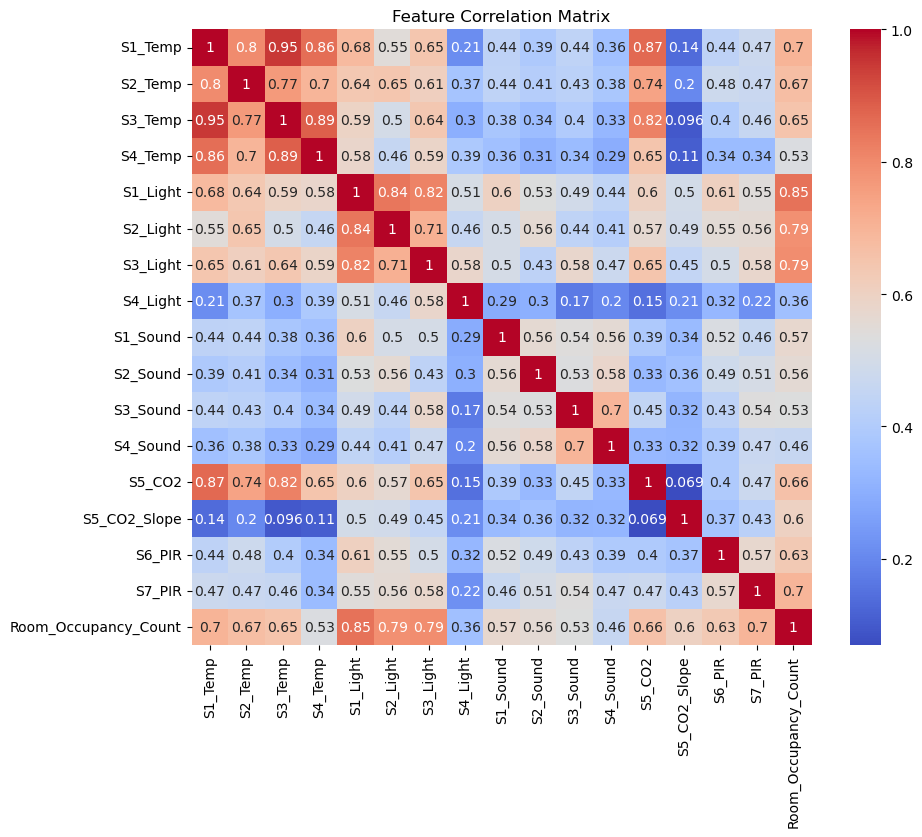

In [ ]:
# Correlation matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


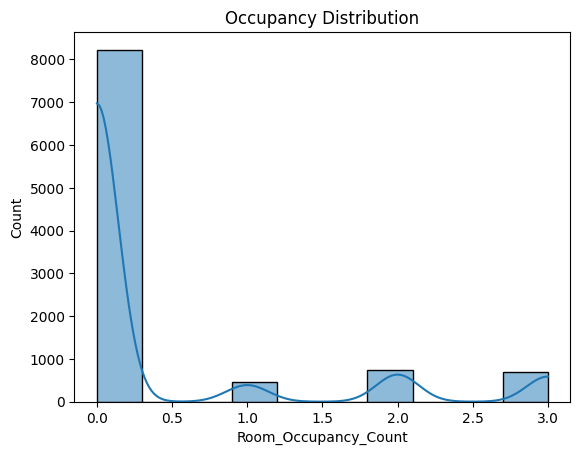

In [7]:
sns.histplot(df['Room_Occupancy_Count'], bins=10, kde=True)
plt.title('Occupancy Distribution')
plt.show()


## Feature Engineering and Machine Learning Model

In [8]:
print(df.dtypes)


Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [9]:
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


In [11]:
# Convert datetime columns to numeric timestamps (seconds since epoc)
for col in df.select_dtypes(include=['datetime64']):
    # Converts to integer (seconds)
    df[col] = df[col].view('int64') // 10**9

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [13]:
# Drop non-numeric columns before training
target = 'Room_Occupancy_Count'  # Define target variable
features = [col for col in df.columns if col not in [target, 'Timestamp', 'Date', 'Time']]  # Exclude non-numeric columns

X = df[features]  # Feature set
y = df[target]  # Target variable


In [14]:
for col in X.select_dtypes(include=['datetime64']):
    X[col] = X[col].astype('int64') // 10**9  # Convert datetime to seconds since epoch



In [15]:
for col in X.select_dtypes(include=['datetime64']):
    X[col] = X[col].astype('int64') // 10**9  # Convert to seconds since epoch


In [16]:
for col in X.select_dtypes(include=['object']):
    X[col] = X[col].astype("category").cat.codes  # Convert categorical text to numeric codes


In [17]:
print(X.dtypes)


S1_Temp         float64
S2_Temp         float64
S3_Temp         float64
S4_Temp         float64
S1_Light          int64
S2_Light          int64
S3_Light          int64
S4_Light          int64
S1_Sound        float64
S2_Sound        float64
S3_Sound        float64
S4_Sound        float64
S5_CO2            int64
S5_CO2_Slope    float64
S6_PIR            int64
S7_PIR            int64
dtype: object


In [18]:
for col in X.select_dtypes(include=['object']):
    X[col] = X[col].astype("category").cat.codes  # Convert categorical data to numbers


In [19]:
print(X.dtypes)  # Ensure no 'datetime64' remains
print(X.head())  # Verify timestamps are now integers


S1_Temp         float64
S2_Temp         float64
S3_Temp         float64
S4_Temp         float64
S1_Light          int64
S2_Light          int64
S3_Light          int64
S4_Light          int64
S1_Sound        float64
S2_Sound        float64
S3_Sound        float64
S4_Sound        float64
S5_CO2            int64
S5_CO2_Slope    float64
S6_PIR            int64
S7_PIR            int64
dtype: object
   S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  S4_Light  \
0    24.94    24.75    24.56    25.38       121        34        53        40   
1    24.94    24.75    24.56    25.44       121        33        53        40   
2    25.00    24.75    24.50    25.44       121        34        53        40   
3    25.00    24.75    24.56    25.44       121        34        53        40   
4    25.00    24.75    24.56    25.44       121        34        54        40   

   S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  S6_PIR  \
0      0.08      0.19      0.06      0.0

In [20]:
for col in X.select_dtypes(include=['datetime64']):
    X[col] = X[col].astype('int64') // 10**9  # Convert to seconds since epoch


In [21]:
print(X.dtypes)  # Must show only int or float types
print(X.isnull().sum())  # Ensure no missing values


S1_Temp         float64
S2_Temp         float64
S3_Temp         float64
S4_Temp         float64
S1_Light          int64
S2_Light          int64
S3_Light          int64
S4_Light          int64
S1_Sound        float64
S2_Sound        float64
S3_Sound        float64
S4_Sound        float64
S5_CO2            int64
S5_CO2_Slope    float64
S6_PIR            int64
S7_PIR            int64
dtype: object
S1_Temp         0
S2_Temp         0
S3_Temp         0
S4_Temp         0
S1_Light        0
S2_Light        0
S3_Light        0
S4_Light        0
S1_Sound        0
S2_Sound        0
S3_Sound        0
S4_Sound        0
S5_CO2          0
S5_CO2_Slope    0
S6_PIR          0
S7_PIR          0
dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Make sure this import is present


# Assuming X and y are already defined as your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X = df.drop(columns=['Room_Occupancy_Count', 'Date', 'Time'])  # Exclude target, 'Date', and 'Time' columns
y = df['Room_Occupancy_Count']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert any remaining datetime columns in X_train and X_test to numeric
for col in X_train.select_dtypes(include=['datetime64']):
    X_train[col] = X_train[col].astype('int64') // 10**9
for col in X_test.select_dtypes(include=['datetime64']):
    X_test[col] = X_test[col].astype('int64') // 10**9

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9990
Precision: 0.9990
Recall: 0.9990
F1 Score: 0.9990


## Deep Learning Model for Occupancy Prediction

In [27]:
# Define a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5906 - loss: -9.2512 - val_accuracy: 0.7848 - val_loss: -206.4607
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: -490.4171 - val_accuracy: 0.7897 - val_loss: -1986.2548
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: -2949.9104 - val_accuracy: 0.7927 - val_loss: -7070.4761
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: -9496.2090 - val_accuracy: 0.7927 - val_loss: -16395.5684
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: -19699.3164 - val_accuracy: 0.7912 - val_loss: -30635.4512
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8029 - loss: -35295.5508 - val_accuracy: 0.7892 - val_loss: -50639.0352
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: -56592.8359 - val_accuracy: 0.7897 - val_loss: -76486.6797
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

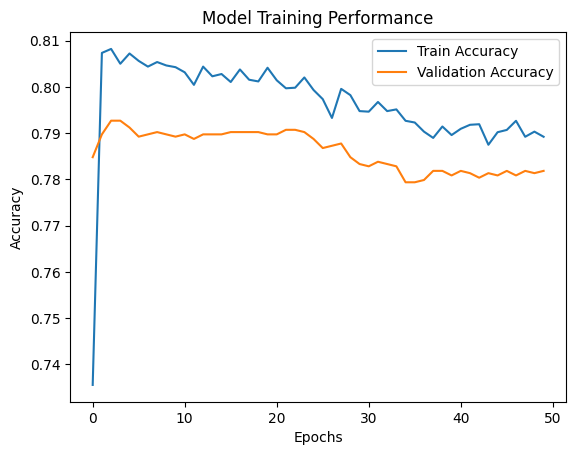

In [28]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training Performance')
plt.show()

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2210 - mae: 0.1996 - val_loss: 0.0273 - val_mae: 0.0553
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0550 - mae: 0.0919 - val_loss: 0.0250 - val_mae: 0.0627
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0483 - mae: 0.0844 - val_loss: 0.0177 - val_mae: 0.0527
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0315 - mae: 0.0737 - val_loss: 0.0165 - val_mae: 0.0618
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0374 - mae: 0.0755 - val_loss: 0.0113 - val_mae: 0.0476
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0290 - mae: 0.0720 - val_loss: 0.0107 - val_mae: 0.0377
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0294 - mae: 0.0720 - val_loss: 0.0082 - val_mae: 0.0353
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0265 - mae: 0.0698 - val_loss: 0.0088 - val_mae: 0.0384
Epoch 9/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step -

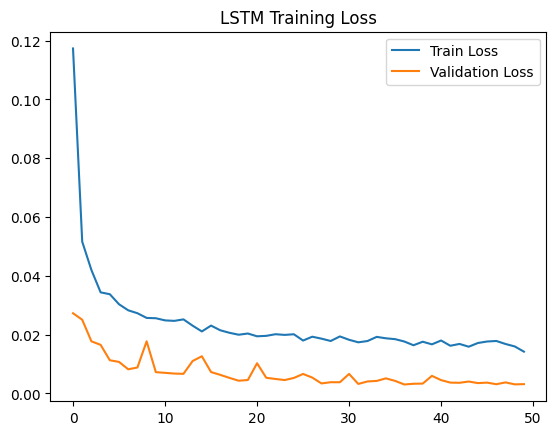

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


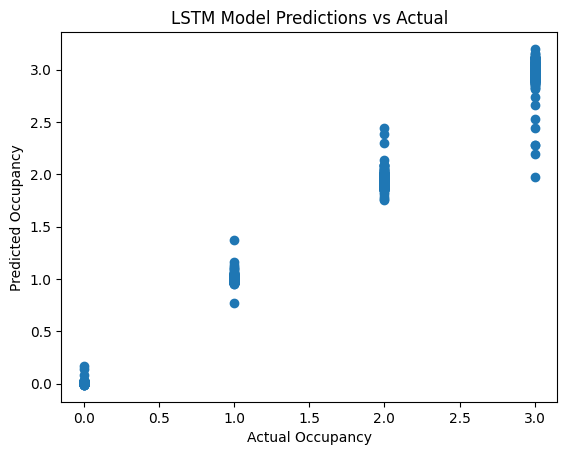

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
# Path to your CSV file within Colab
csv_path = '/content/sample_data/Occupancy_Estimation.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Combine 'Date' and 'Time' columns into a single 'Timestamp' column
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df.set_index('Timestamp', inplace=True)

# Drop the original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Define features and target variable
target = 'Room_Occupancy_Count'
features = [col for col in df.columns if col != target]

# Scale data
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Prepare time series sequences
def create_sequences(data, target_values, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])  # Features for past 10 timesteps
        y.append(target_values[i+sequence_length])  # Correct occupancy value
    return np.array(X), np.array(y)

sequence_length = 10  # 10 previous timesteps to predict next occupancy
X, y = create_sequences(df[features].values, df[target].values, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Occupancy")
plt.ylabel("Predicted Occupancy")
plt.title("LSTM Model Predictions vs Actual")
plt.show()


In [31]:
print(clf)


RandomForestClassifier(random_state=42)
